# Projet Machine Learning

##Introduction
Dans un monde où les menaces cybernétiques sont devenues de plus en plus sophistiquées, la détection des anomalies dans le trafic réseau est devenue cruciale pour la sécurité informatique. Ce projet vise à développer un modèle
d'apprentissage automatique efficace et explicatif pour détecter ces anomalies.

En se concentrant sur l'efficacité et l'explicabilité, notre objectif est de créer un modèle capable d'identifier les modèles inhabituels dans le trafic réseau, aidant ainsi les professionnels de la cybersécurité à mieux comprendre et contrer les menaces potentielles. Pour ce faire, nous utiliserons le dataset CICIDS2017, qui offre des données réelles de trafic réseau pour le développement et le test de notre modèle.

##Imports

In [ ]:
!pip install keras
!pip install scikeras
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/data/dataset (1).csv')

In [ ]:
dataset=dataset.sample(frac=0.02)
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
570783,80,85016150,6,6,357,11595,357,0,59.500000,145.744640,...,32,2.0,0.0,2,2,84900000.0,0.0,84900000,84900000,DoS
442580,49691,56,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
627037,80,99203787,5,7,421,11595,409,0,84.200000,181.593502,...,20,14005.0,0.0,14005,14005,99200000.0,0.0,99200000,99200000,DoS
1017017,53,194,2,2,80,290,40,40,40.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
972979,53,276,2,2,62,94,31,31,31.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923506,53,211476,2,2,90,652,45,45,45.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
257601,53,53795,1,1,64,117,64,64,64.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
457761,123,16517,1,1,48,48,48,48,48.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1039082,39032,88,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


##Data Visualization and Cleaning

In [ ]:
dataset.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
800434,53,787,2,2,72,190,36,36,36.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
594958,80,80848727,7,5,346,11595,346,0,49.428571,130.775708,...,32,692.0,0.0,692,692,80700000.0,0.0,80700000,80700000,DoS
981144,80,36974,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
615734,80,99089806,5,7,353,11595,341,0,70.600000,151.187962,...,20,12010.0,0.0,12010,12010,99000000.0,0.0,99000000,99000000,DoS
624206,80,98510755,6,5,389,11595,371,0,64.833333,150.019221,...,20,16024.0,0.0,16024,16024,98500000.0,0.0,98500000,98500000,DoS


In [ ]:
dataset.tail(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
950648,37096,97,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
911267,49373,53,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
513421,80,41099,3,7,370,11595,370,0,123.333333,213.619600,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS
835192,80,5216400,3,1,12,0,6,0,4.000000,3.464102,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
889496,53,23774,2,2,72,128,36,36,36.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Fix missing Data

In [ ]:
dataset.isnull()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
570783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
442580,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
627037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1017017,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
972979,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
257601,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
457761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1039082,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isna().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

**Fonction isnull() :**
Cette fonction est utilisée pour détecter les valeurs manquantes dans un DataFrame pandas.
Elle renvoie une DataFrame de la même taille que l'objet d'origine, où chaque élément est True si la valeur correspondante dans l'objet d'origine est manquante (NaN), et False sinon.

**Fonction isna().sum() :**
isna() est en fait un alias de isnull(). Les deux fonctions sont identiques et peuvent être utilisées de manière interchangeable.
sum() est une méthode qui, lorsqu'elle est utilisée après isna() ou isnull(), compte le nombre de valeurs manquantes dans chaque colonne du DataFrame.
Ainsi, isna().sum() renvoie une série (ou une DataFrame si vous utilisez sum(axis=1)) où chaque valeur correspond au nombre de valeurs manquantes dans chaque colonne du DataFrame.

##Identification et suppression des doublons

In [ ]:
dataset.duplicated()

570783     False
442580     False
627037     False
1017017    False
972979     False
           ...  
923506     False
257601     False
457761     False
1039082    False
672258     False
Length: 20851, dtype: bool

In [ ]:
# Identification des valeurs manquantes
print(dataset.isnull().sum())

# Option 1: Suppression des lignes contenant des valeurs manquantes
dataset_cleaned = dataset.dropna()

# Option 2: Remplissage des valeurs manquantes (par exemple, avec la médiane)
# df_cleaned = df.fillna(df.median())

# Affichage du nombre de lignes avant et après le nettoyage
print("Nombre de lignes avant nettoyage:", len(dataset))
print("Nombre de lignes après nettoyage:", len(dataset_cleaned))

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64
Nombre de lignes avant nettoyage: 20851
Nombre de lignes après nettoyage: 20851


## **Analyse Exploratoire des Données (EDA)**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20851 entries, 570783 to 672258
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             20851 non-null  int64  
 1    Flow Duration                20851 non-null  int64  
 2    Total Fwd Packets            20851 non-null  int64  
 3    Total Backward Packets       20851 non-null  int64  
 4   Total Length of Fwd Packets   20851 non-null  int64  
 5    Total Length of Bwd Packets  20851 non-null  int64  
 6    Fwd Packet Length Max        20851 non-null  int64  
 7    Fwd Packet Length Min        20851 non-null  int64  
 8    Fwd Packet Length Mean       20851 non-null  float64
 9    Fwd Packet Length Std        20851 non-null  float64
 10  Bwd Packet Length Max         20851 non-null  int64  
 11   Bwd Packet Length Min        20851 non-null  int64  
 12   Bwd Packet Length Mean       20851 non-null  float64
 13  

In [ ]:
dataset.describe(include = "all")

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,20851.000000,2.085100e+04,20851.000000,20851.000000,20851.000000,2.085100e+04,20851.000000,20851.000000,20851.000000,20851.000000,...,20851.000000,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,20851
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENIGN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12546
mean,7228.702316,2.346389e+07,5.648218,5.439164,620.164836,6.021451e+03,284.907343,17.237591,78.341174,105.108723,...,25.642703,1.101455e+05,4.062059e+04,1.763111e+05,8.595348e+04,1.719710e+07,1.179644e+06,1.807094e+07,1.632395e+07,NaN
std,17179.809394,3.971559e+07,17.698523,30.136271,4985.329019,5.564690e+04,994.478446,81.141616,262.944728,410.910649,...,6.710592,6.615250e+05,3.719298e+05,1.007439e+06,6.038475e+05,3.342650e+07,7.401417e+06,3.450542e+07,3.318472e+07,NaN
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,53.000000,2.340000e+02,2.000000,1.000000,12.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,80.000000,1.088090e+05,3.000000,2.000000,64.000000,1.700000e+02,38.000000,0.000000,35.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,443.000000,2.289687e+07,6.000000,6.000000,350.000000,1.159500e+04,317.000000,30.000000,53.101010,112.661137,...,32.000000,9.930000e+02,0.000000e+00,9.930000e+02,9.900000e+02,9.957449e+06,0.000000e+00,1.000000e+07,8.512262e+06,NaN


In [ ]:
dataset.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,20851.000000,2.085100e+04,20851.000000,20851.000000,20851.000000,2.085100e+04,20851.000000,20851.000000,20851.000000,20851.000000,...,20851.000000,20851.000000,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04,2.085100e+04
mean,7228.702316,2.346389e+07,5.648218,5.439164,620.164836,6.021451e+03,284.907343,17.237591,78.341174,105.108723,...,2.990888,25.642703,1.101455e+05,4.062059e+04,1.763111e+05,8.595348e+04,1.719710e+07,1.179644e+06,1.807094e+07,1.632395e+07
std,17179.809394,3.971559e+07,17.698523,30.136271,4985.329019,5.564690e+04,994.478446,81.141616,262.944728,410.910649,...,15.162607,6.710592,6.615250e+05,3.719298e+05,1.007439e+06,6.038475e+05,3.342650e+07,7.401417e+06,3.450542e+07,3.318472e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,2.340000e+02,2.000000,1.000000,12.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,1.088090e+05,3.000000,2.000000,64.000000,1.700000e+02,38.000000,0.000000,35.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,2.289687e+07,6.000000,6.000000,350.000000,1.159500e+04,317.000000,30.000000,53.101010,112.661137,...,3.000000,32.000000,9.930000e+02,0.000000e+00,9.930000e+02,9.900000e+02,9.957449e+06,0.000000e+00,1.000000e+07,8.512262e+06
max,65530.000000,1.199997e+08,1455.000000,3055.000000,609185.000000,6.007926e+06,11658.000000,1460.000000,2901.750000,5796.500690,...,1453.000000,48.000000,1.710000e+07,1.530000e+07,4.060000e+07,1.710000e+07,1.190000e+08,6.580000e+07,1.190000e+08,1.190000e+08


In [ ]:
categorical_columns = [col for col in dataset.columns if dataset[col].dtype == 'object']
for col in categorical_columns:
    print(dataset[col].value_counts())

 Label
BENIGN      12546
DoS          3871
DDoS         2593
PortScan     1841
Name: count, dtype: int64


In [ ]:
# Remplacer les inf/-inf par NaN
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_columns = [col for col in dataset.columns if dataset[col].dtype != 'object']

for col in numerical_columns:
    dataset[col].fillna(dataset[col].median(), inplace=True)


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

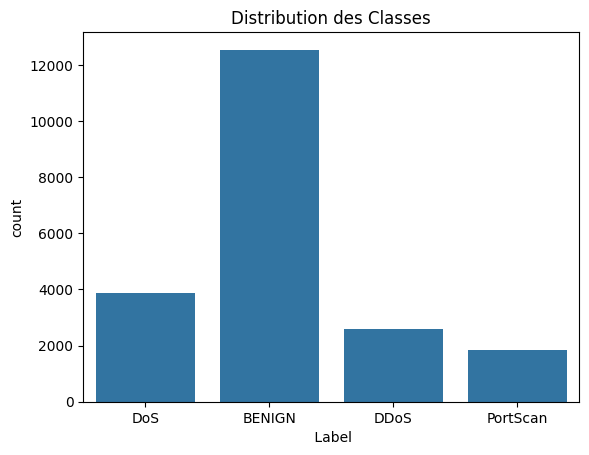

        Destination Port   Flow Duration   Total Fwd Packets  \
count       20851.000000    2.085100e+04        20851.000000   
mean         7228.702316    2.346389e+07            5.648218   
std         17179.809394    3.971559e+07           17.698523   
min             0.000000   -1.000000e+00            1.000000   
25%            53.000000    2.340000e+02            2.000000   
50%            80.000000    1.088090e+05            3.000000   
75%           443.000000    2.289687e+07            6.000000   
max         65530.000000    1.199997e+08         1455.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count             20851.000000                 20851.000000   
mean                  5.439164                   620.164836   
std                  30.136271                  4985.329019   
min                   0.000000                     0.000000   
25%                   1.000000                    12.000000   
50%                   2.000000               

In [ ]:
# Distribution des classes (normal vs anomalie)
print(dataset_cleaned.columns)

# Visualisation de la distribution des classes
sns.countplot(x=' Label', data=dataset_cleaned)  # Notez l'espace dans le nom de la colonne
plt.title('Distribution des Classes')
plt.show()


# Affichage de quelques statistiques descriptives pour les colonnes numériques
print(dataset_cleaned.describe())


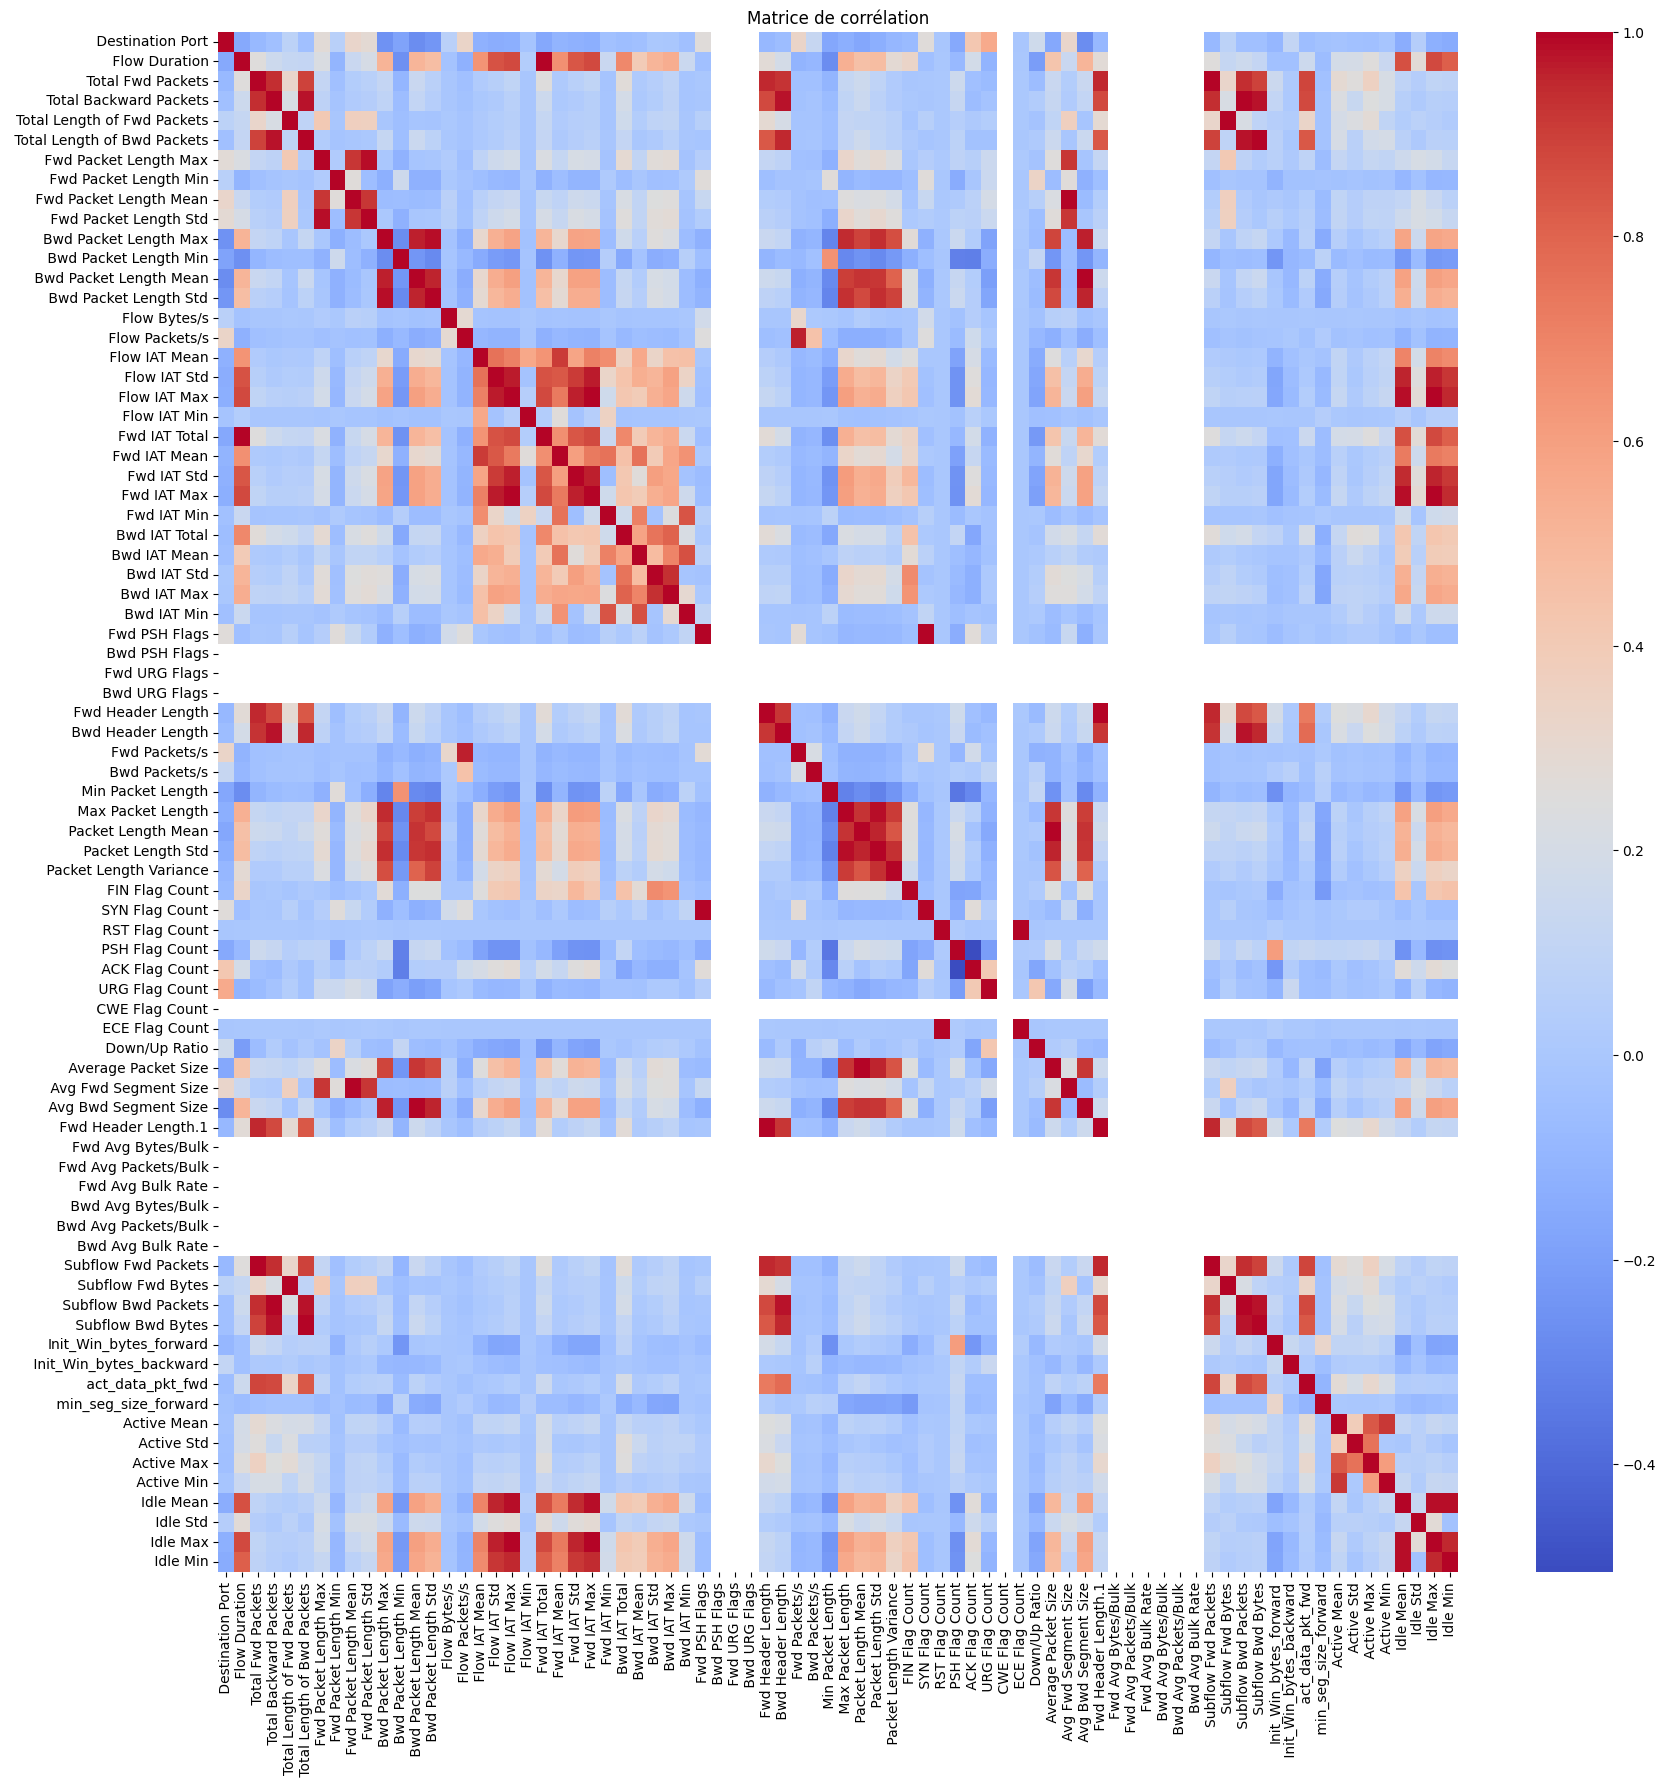

In [ ]:
#Matrice de corrélation
numeric_dataset = dataset.select_dtypes(include=['int64', 'float64'])
matrice_corr = numeric_dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matrice_corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()
#Les deux variables les plus correlées avec l'indice de performances sont 'Hours Studied' et 'Previous Scores'.

##Découpage de la data en des paires (DoS,BENIGN),(DDoS,BENIGN)(PortScan,BENIGN)

Création de nouveaux dataframes en prenant des lignes avec certaines étiquettes du dataframe existant.

### DoS et BENIGN

In [ ]:
DoS_df1=dataset[dataset[' Label']=='BENIGN']
# Use the concat() method to combine the dataframes
DoS_df = pd.concat([dataset[dataset[' Label']=='BENIGN'], dataset[dataset[' Label']=='DoS']], axis=0)

# Display the combined dataframe
DoS_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
442580,49691,56,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1017017,53,194,2,2,80,290,40,40,40.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
972979,53,276,2,2,62,94,31,31,31.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
878374,443,239382,11,8,526,4245,193,0,47.818182,70.987067,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
820393,443,1301942,17,14,828,15655,233,0,48.705882,78.025448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484939,80,3003479,3,0,0,0,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,DoS
544328,80,97383051,6,8,369,11595,351,0,61.500000,141.855913,...,20,12995.0,0.0,12995,12995,97400000.0,0.0,97400000,97400000,DoS
674863,80,99214084,7,5,317,11595,293,0,45.285714,109.268346,...,20,17027.0,0.0,17027,17027,99200000.0,0.0,99200000,99200000,DoS
638536,80,98478672,8,6,410,11595,410,0,51.250000,144.956890,...,32,1002.0,0.0,1002,1002,98500000.0,0.0,98500000,98500000,DoS


### DDoS et BENIGN

In [ ]:
DDoS_df1=dataset[dataset[' Label']=='BENIGN']
# Use the concat() method to combine the dataframes
DDoS_df = pd.concat([dataset[dataset[' Label']=='BENIGN'], dataset[dataset[' Label']=='DDoS']], axis=0)

# Display the combined dataframe
DDoS_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
442580,49691,56,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1017017,53,194,2,2,80,290,40,40,40.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
972979,53,276,2,2,62,94,31,31,31.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
878374,443,239382,11,8,526,4245,193,0,47.818182,70.987067,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
820393,443,1301942,17,14,828,15655,233,0,48.705882,78.025448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90258,80,2746979,4,0,24,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS
99630,80,9250736,5,0,30,0,6,6,6.000000,0.000000,...,20,973.0,0.0,973,973,9249763.0,0.0,9249763,9249763,DDoS
116570,80,8744761,4,0,24,0,6,6,6.000000,0.000000,...,20,785.0,0.0,785,785,8743976.0,0.0,8743976,8743976,DDoS
168583,80,447194,3,5,26,11601,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DDoS


### PortScan et BENIGN  

In [ ]:
PortScan_df1 = dataset[dataset[' Label'] == 'BENIGN']
PortScan_df2 = dataset[dataset[' Label'] == 'PortScan']

# Concatenate the two DataFrames
PortScan_df = pd.concat([PortScan_df1, PortScan_df2])

# Display the concatenated DataFrame
PortScan_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
442580,49691,56,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1017017,53,194,2,2,80,290,40,40,40.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
972979,53,276,2,2,62,94,31,31,31.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
878374,443,239382,11,8,526,4245,193,0,47.818182,70.987067,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
820393,443,1301942,17,14,828,15655,233,0,48.705882,78.025448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409886,3801,92,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
312929,3580,60,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
358865,5555,29,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
360113,1132,18,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan


##**Clustering**

### Étiqueter tous les trafic d'attaque comme anormal sauf BENIGN qui va être comme normal :

In [ ]:
NA_df=dataset
NA_df[' Label']=NA_df[' Label'].apply({'DoS':'Anormal','BENIGN':'Normal' ,'DDoS':'Anormal', 'PortScan':'Anormal'}.get)
NA_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
570783,80,85016150,6,6,357,11595,357,0,59.500000,145.744640,...,32,2.0,0.0,2,2,84900000.0,0.0,84900000,84900000,Anormal
442580,49691,56,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
627037,80,99203787,5,7,421,11595,409,0,84.200000,181.593502,...,20,14005.0,0.0,14005,14005,99200000.0,0.0,99200000,99200000,Anormal
1017017,53,194,2,2,80,290,40,40,40.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
972979,53,276,2,2,62,94,31,31,31.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923506,53,211476,2,2,90,652,45,45,45.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
257601,53,53795,1,1,64,117,64,64,64.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
457761,123,16517,1,1,48,48,48,48,48.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1039082,39032,88,2,1,31,6,31,0,15.500000,21.920310,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal


###K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
dataset_classif=dataset

In [ ]:
def convert_label(label):
    if label == 'anormal':
        return 0
    elif label == 'normal':
        return 1
    else:
        return label  # Si la valeur n'est ni "anormal" ni "normal", la retourner telle quelle

# Appliquer la fonction à la colonne 'Label'
dataset_classif['Label'] = dataset_classif['Label'].apply(convert_label)

In [ ]:
k = 3 # Nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=0)

In [ ]:
dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce').dropna()

In [ ]:
kmeans.fit(dataset_numeric)

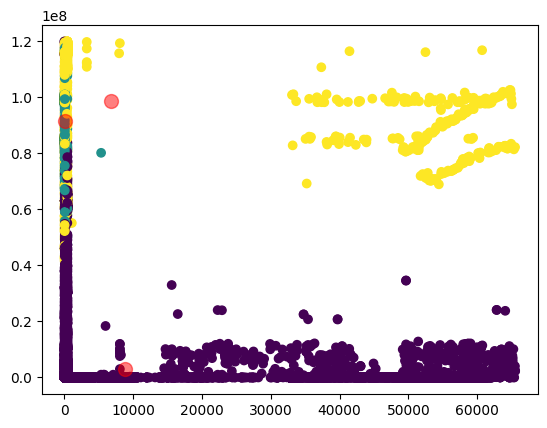

In [ ]:
centers = kmeans.cluster_centers_
# Afficher les points
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=kmeans.labels_, cmap='viridis')

# Afficher les centres des clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)

plt.show()


### Mean Shift

In [ ]:
from sklearn.cluster import MeanShift

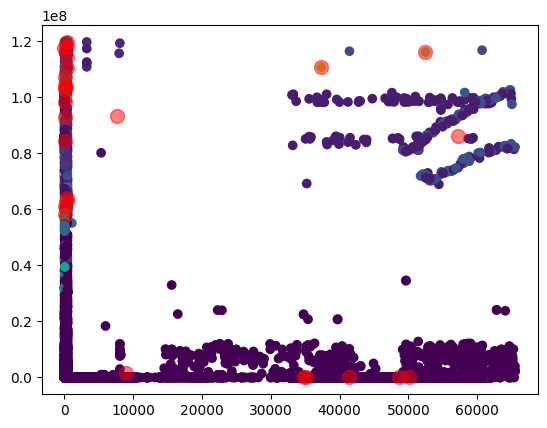

In [ ]:
bandwidth = None
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(dataset)
centers = mean_shift.cluster_centers_
plt.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=mean_shift.labels_, cmap='viridis')

# Afficher les centres des clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.5)

plt.show()

## **Classification**

In [ ]:
def train_test_dataset(df):
    labelencoder = LabelEncoder()
    df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
    X = df.drop([' Label'],axis=1)
    y = df.iloc[:, -1].values.reshape(-1,1)
    y=np.ravel(y)
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0, stratify = y)
    return  X_train, X_test, y_train, y_test

###Random Forest

In [ ]:
def RandomForest(X_train, X_test, y_train, y_test):
    # Convert string columns to numeric, handling errors by converting non-convertible values to NaN
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')
    # Replace infinite values with NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)
    y_train = pd.cut(y_train, bins=4, labels=False) # Convert continuous to discrete categories
    y_test = pd.cut(y_test, bins=4, labels=False) # Convert continuous to discrete categories
    rf = RandomForestClassifier(random_state=0)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)
    rf.fit(X_train, y_train)
    rf_score = rf.score(X_test, y_test)
    y_predict = rf.predict(X_test)
    y_true = y_test
    print('Random Forest Accuracy:', rf_score)
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
    print('Random Forest precision_recall_fscore:', precision, recall, fscore)
    cm = confusion_matrix(y_true, y_predict)
   #f, ax = plt.subplots(figsize=(5, 5))
    #sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
    #plt.xlabel("y_pred")
    #plt.ylabel("y_true")
    #plt.show()
    plt.figure(figsize=(10, 8))
    plt.scatter(y_true, y_predict, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Random Forest Predictions vs True Values')
    return rf_score, precision, recall, fscore, _


###Décision Tree

In [ ]:
from sklearn.tree import plot_tree

def DecisionTree(X_train, X_test, y_train, y_test):
    # Convert string columns to numeric, handling errors by converting non-convertible values to NaN
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    # Replace infinite values with NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)

    y_train = pd.cut(y_train, bins=4, labels=False) # Convert continuous to discrete categories
    y_test = pd.cut(y_test, bins=4, labels=False) # Convert continuous to discrete categories

    dt = DecisionTreeClassifier(random_state=0)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)

    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    print('Decision Tree Accuracy:', score)

    y_predict = dt.predict(X_test)
    y_true = y_test
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
    print('Decision Tree precision_recall_fscore:', precision, recall, fscore)

    plt.figure(figsize=(10, 10))
    plot_tree(dt, filled=True)
    plt.show()
    return score, precision, recall, fscore, _

###KNN

In [ ]:

def kNN(X_train, X_test, y_train, y_test):
    # Conversion des colonnes de chaînes en valeurs numériques, en convertissant les valeurs non convertibles en NaN
    X_train = X_train.apply(pd.to_numeric, errors='coerce')
    X_test = X_test.apply(pd.to_numeric, errors='coerce')

    # Remplacement des valeurs infinies par NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_test = X_test.replace([np.inf, -np.inf], np.nan)

    # Supposons que y_train et y_test sont des variables continues et doivent être converties en catégories discrètes
    y_train = pd.cut(y_train, bins=4, labels=False) # Convertir des valeurs continues en catégories discrètes
    y_test = pd.cut(y_test, bins=4, labels=False) # Convertir des valeurs continues en catégories discrètes

    knn = KNeighborsClassifier(n_neighbors=5)
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    imputer = imputer.fit(X_train)
    X_train = imputer.transform(X_train)
    X_test = imputer.transform(X_test)

    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    print("Score du 5-NN:", score)

    # Afficher le diagramme de dispersion pour les prédictions KNN
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction, cmap='viridis', marker='o', edgecolors='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Diagramme KNN')
    plt.colorbar(label='Classe prédite')
    plt.show()

    y_predict = knn.predict(X_test)
    y_true = y_test
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
    print('Précision, rappel, F-score du 5-NN:', precision, recall, fscore)

    return score, precision, recall, fscore, _


###ANN

In [ ]:
def build_classifier(X_train):
    def bm():
        classifier = Sequential() # initialize neural network
        classifier.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
        classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
       # classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu'))
        classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
        lr=.003
        adam0=Adam(learning_rate=0.003)

        classifier.compile(optimizer =adam0, loss = 'categorical_crossentropy', metrics = ['accuracy'])
        return classifier
    return bm

In [ ]:
def ANN(X_train, X_test, y_train, y_test):
    y_ = to_categorical(y_train)
    y_t=to_categorical(y_test)
    estimator  = KerasClassifier(build_fn = build_classifier(X_train), epochs = 5)
    accuracies = cross_val_score(estimator, X = X_train, y = y_, cv = 3)
    mean = accuracies.mean()
    variance = accuracies.std()
    print("Accuracy mean: "+ str(mean))
    print("Accuracy variance: "+ str(variance))


## Feature

In [ ]:
def feature_selection(dataset):
    # Separate features and target variable
    X = dataset.drop([' Label'], axis=1)
    Y = dataset[' Label']
    # Encode target variable
    labelencoder = LabelEncoder()
    Y_encoded = labelencoder.fit_transform(Y)
    # Define preprocessing steps for numeric and non-numeric columns
    numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    # Apply transformations based on column types
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor())])
    # Fit pipeline to the data
    pipeline.fit(X, Y_encoded)
    # Get feature importances
    feature_importances = pipeline.named_steps['regressor'].feature_importances_
    # Get feature names
    feature_names = X.columns
    # Print features sorted by their importance score
    print("Features sorted by their score:")
    sorted_features = sorted(zip(map(lambda x: round(x, 4), feature_importances), feature_names), reverse=True)
    print(sorted_features)

    # Create a bar plot of feature importances
    plt.figure(figsize=(20, 20))
    plt.barh(range(len(sorted_features)), [x[0] for x in sorted_features], align='center')
    plt.yticks(range(len(sorted_features)), [x[1] for x in sorted_features])
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.show()

Features sorted by their score:
[(0.4662, ' Bwd Packet Length Std'), (0.2811, ' Average Packet Size'), (0.1317, ' Bwd Header Length'), (0.0311, 'Init_Win_bytes_forward'), (0.0295, ' Destination Port'), (0.0094, ' Max Packet Length'), (0.0081, ' Packet Length Mean'), (0.0061, ' Active Std'), (0.0041, ' Fwd IAT Mean'), (0.0039, ' Bwd IAT Std'), (0.0033, 'FIN Flag Count'), (0.0033, ' Flow IAT Min'), (0.0031, ' Init_Win_bytes_backward'), (0.0024, ' Flow IAT Mean'), (0.0015, ' Flow IAT Std'), (0.0014, ' Fwd IAT Min'), (0.0013, ' URG Flag Count'), (0.001, ' Fwd Packet Length Std'), (0.0007, ' Flow Packets/s'), (0.0006, ' Fwd IAT Max'), (0.0005, 'Fwd Packets/s'), (0.0005, 'Active Mean'), (0.0005, ' Bwd Packets/s'), (0.0005, ' Bwd Packet Length Mean'), (0.0004, 'Total Length of Fwd Packets'), (0.0004, ' Subflow Fwd Bytes'), (0.0004, ' Subflow Bwd Bytes'), (0.0004, ' Fwd IAT Std'), (0.0004, ' Fwd Header Length.1'), (0.0004, ' Fwd Header Length'), (0.0004, ' Flow IAT Max'), (0.0004, ' Bwd IAT Mi

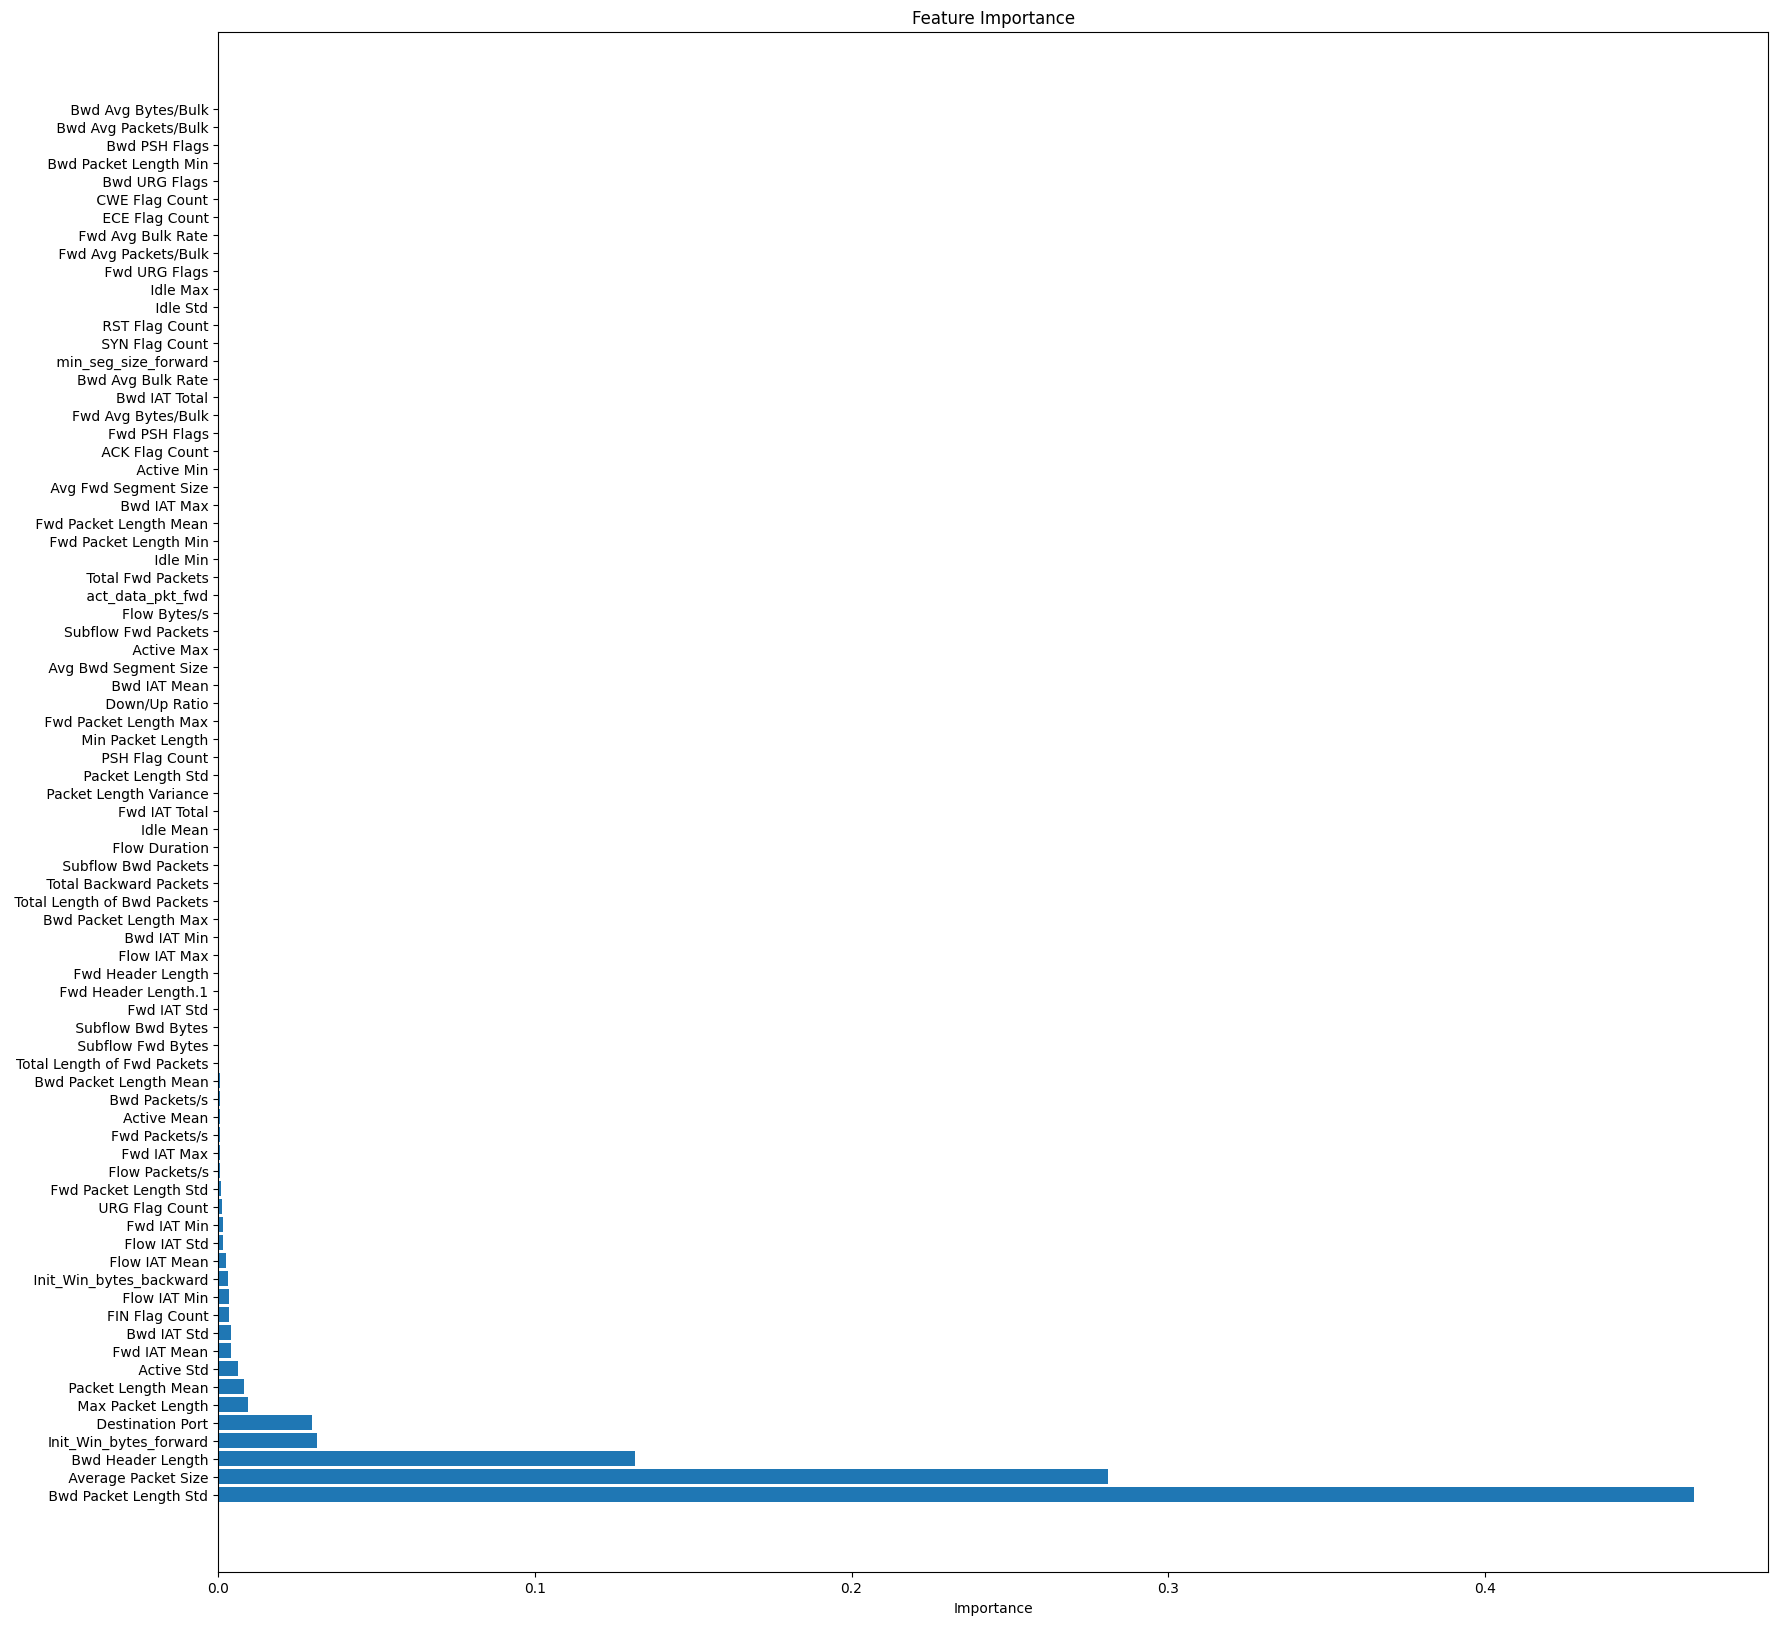

In [ ]:
feature_selection(dataset)

Features sorted by their score:
[(0.4662, ' Bwd Packet Length Std'), (0.2811, ' Average Packet Size'), (0.1317, ' Bwd Header Length'), (0.0311, 'Init_Win_bytes_forward'), (0.0295, ' Destination Port'), (0.0094, ' Max Packet Length'), (0.0081, ' Packet Length Mean'), (0.0061, ' Active Std'), (0.0041, ' Fwd IAT Mean'), (0.0039, ' Bwd IAT Std'), (0.0033, 'FIN Flag Count'), (0.0033, ' Flow IAT Min'), (0.0031, ' Init_Win_bytes_backward'), (0.0024, ' Flow IAT Mean'), (0.0015, ' Flow IAT Std'), (0.0014, ' Fwd IAT Min'), (0.0013, ' URG Flag Count'), (0.001, ' Fwd Packet Length Std'), (0.0007, ' Flow Packets/s'), (0.0006, ' Fwd IAT Max'), (0.0005, 'Fwd Packets/s'), (0.0005, 'Active Mean'), (0.0005, ' Bwd Packets/s'), (0.0005, ' Bwd Packet Length Mean'), (0.0004, 'Total Length of Fwd Packets'), (0.0004, ' Subflow Fwd Bytes'), (0.0004, ' Subflow Bwd Bytes'), (0.0004, ' Fwd IAT Std'), (0.0004, ' Fwd Header Length.1'), (0.0004, ' Fwd Header Length'), (0.0004, ' Flow IAT Max'), (0.0004, ' Bwd IAT Min'), (0.0003, 'Bwd Packet Length Max'), (0.0003, ' Total Length of Bwd Packets'), (0.0003, ' Total Backward Packets'), (0.0003, ' Subflow Bwd Packets'), (0.0003, ' Flow Duration'), (0.0002, 'Idle Mean'), (0.0002, 'Fwd IAT Total'), (0.0002, ' Packet Length Variance'), (0.0002, ' Packet Length Std'), (0.0002, ' PSH Flag Count'), (0.0002, ' Min Packet Length'), (0.0002, ' Fwd Packet Length Max'), (0.0002, ' Down/Up Ratio'), (0.0002, ' Bwd IAT Mean'), (0.0002, ' Avg Bwd Segment Size'), (0.0002, ' Active Max'), (0.0001, 'Subflow Fwd Packets'), (0.0001, 'Flow Bytes/s'), (0.0001, ' act_data_pkt_fwd'), (0.0001, ' Total Fwd Packets'), (0.0001, ' Idle Min'), (0.0001, ' Fwd Packet Length Min'), (0.0001, ' Fwd Packet Length Mean'), (0.0001, ' Bwd IAT Max'), (0.0001, ' Avg Fwd Segment Size'), (0.0001, ' Active Min'), (0.0001, ' ACK Flag Count'), (0.0, 'Fwd PSH Flags'), (0.0, 'Fwd Avg Bytes/Bulk'), (0.0, 'Bwd IAT Total'), (0.0, 'Bwd Avg Bulk Rate'), (0.0, ' min_seg_size_forward'), (0.0, ' SYN Flag Count'), (0.0, ' RST Flag Count'), (0.0, ' Idle Std'), (0.0, ' Idle Max'), (0.0, ' Fwd URG Flags'), (0.0, ' Fwd Avg Packets/Bulk'), (0.0, ' Fwd Avg Bulk Rate'), (0.0, ' ECE Flag Count'), (0.0, ' CWE Flag Count'), (0.0, ' Bwd URG Flags'), (0.0, ' Bwd Packet Length Min'), (0.0, ' Bwd PSH Flags'), (0.0, ' Bwd Avg Packets/Bulk'), (0.0, ' Bwd Avg Bytes/Bulk')]

Création d'ensembles de données Train et Test pour toutes les trames de données

In [ ]:
DoSX_train, DoSX_test, DoSy_train, DoSy_test=train_test_dataset(DoS_df)
DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test=train_test_dataset(DDoS_df)
PS_X_train,PS_X_test,PS_y_train, PS_y_test=train_test_dataset(PortScan_df)
NA_X_train, NA_X_test, NA_y_train, NA_y_test=train_test_dataset(NA_df)

### Classification pour DOS et BENIGN:

Random Forest Accuracy: 0.9967657165959167
Random Forest precision_recall_fscore: 0.9967640603599797 0.9967657165959167 0.9967628623004233


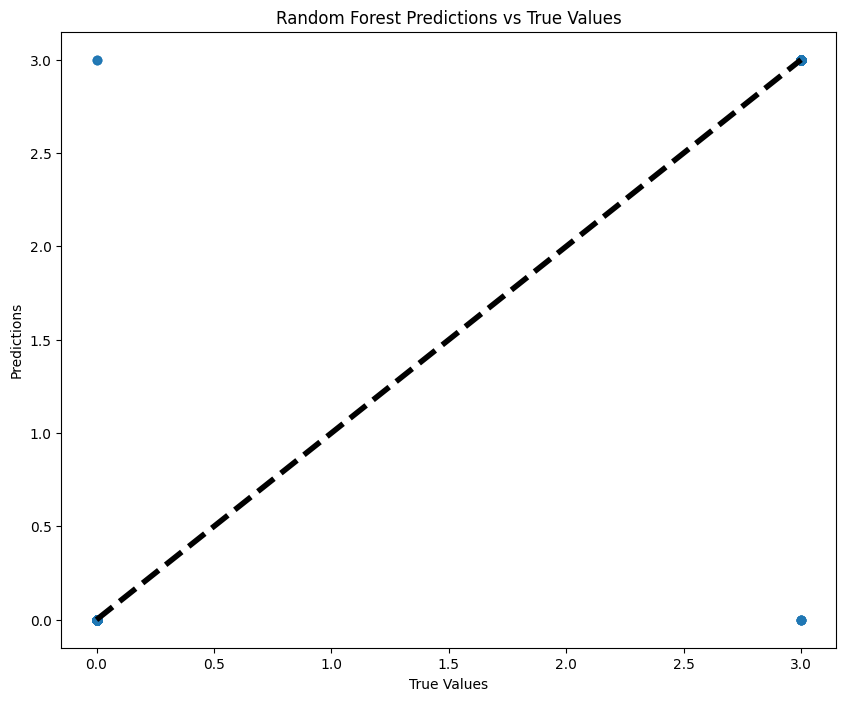

In [ ]:
dosrf_score,dosrf_precision,dosrf_recall,dosrf_fscore,none=RandomForest(DoSX_train, DoSX_test, DoSy_train, DoSy_test)

Decision Tree Accuracy: 0.9969549330085262
Decision Tree precision_recall_fscore: 0.9969541568336913 0.9969549330085262 0.996951747640032


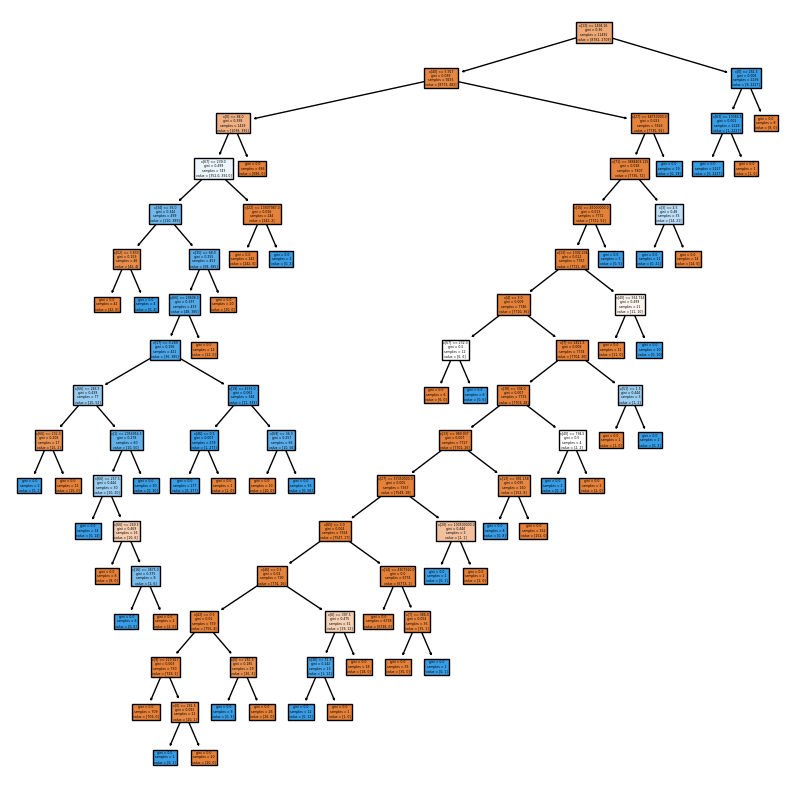

In [ ]:
dosdt_score,dosdt_precision,dosdt_recall,dosdt_fscore,none=DecisionTree(DoSX_train, DoSX_test, DoSy_train, DoSy_test)

Score du 5-NN: 0.9786845310596833


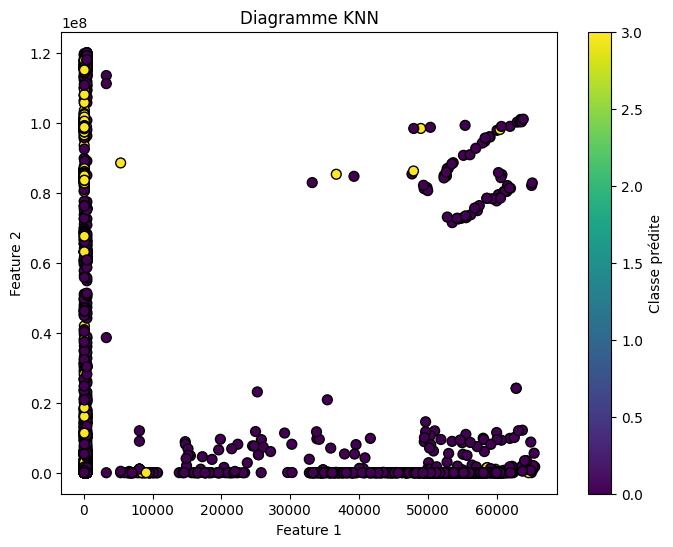

Précision, rappel, F-score du 5-NN: 0.9786360721301766 0.9786845310596833 0.9786558236000906


In [ ]:
dosKnn_score,dosKnn_precision,dosKnn_recall,dosKnn_fscore,none=kNN(DoSX_train, DoSX_test, DoSy_train, DoSy_test)

###Classification pour Portscan et BENIGN:

Random Forest Accuracy: 0.9997683576557794
Random Forest precision_recall_fscore: 0.9997684191646335 0.9997683576557794 0.9997682680294391


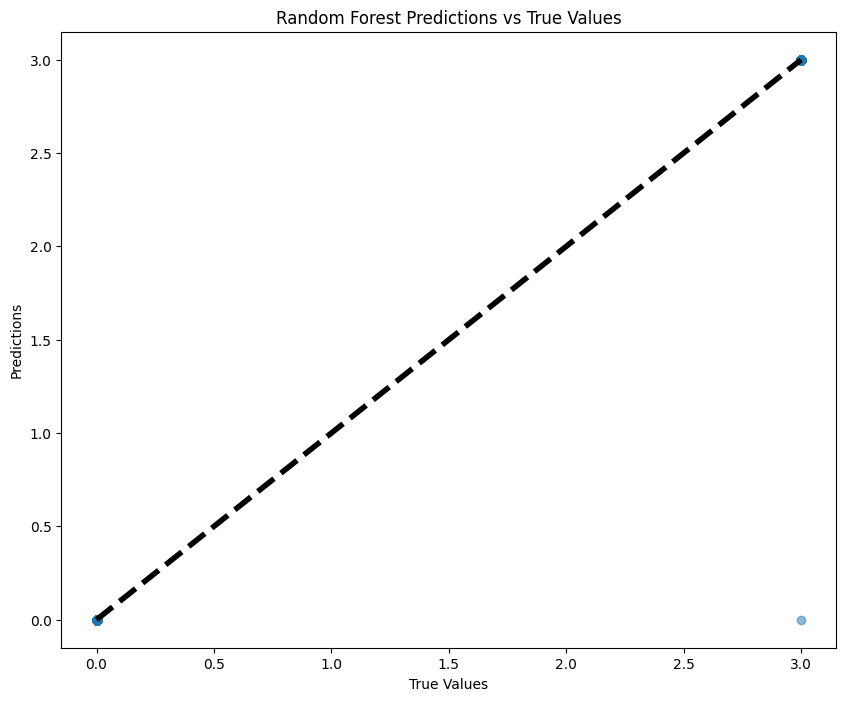

In [ ]:
psrf_score,psrf_precision,psrf_recall,psrf_fscore,none=RandomForest(PS_X_train,PS_X_test,PS_y_train, PS_y_test)

Decision Tree Accuracy: 0.9988417882788974
Decision Tree precision_recall_fscore: 0.9988466120392531 0.9988417882788974 0.9988431268600503


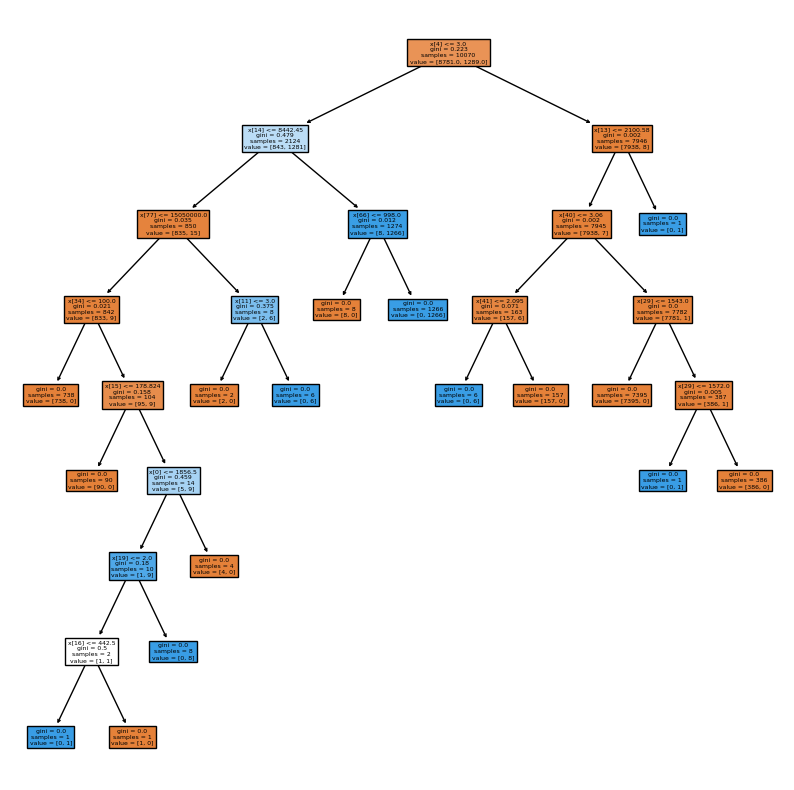

In [ ]:
psdt_score,psdt_precision,psdt_recall,psdt_fscore,none=DecisionTree(PS_X_train,PS_X_test,PS_y_train, PS_y_test)

Score du 5-NN: 0.9944405837387075


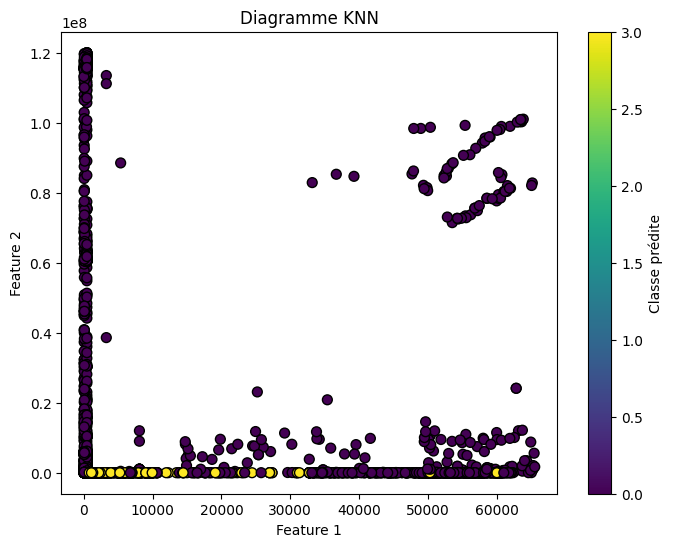

Précision, rappel, F-score du 5-NN: 0.9944329168506062 0.9944405837387075 0.9944362770026133


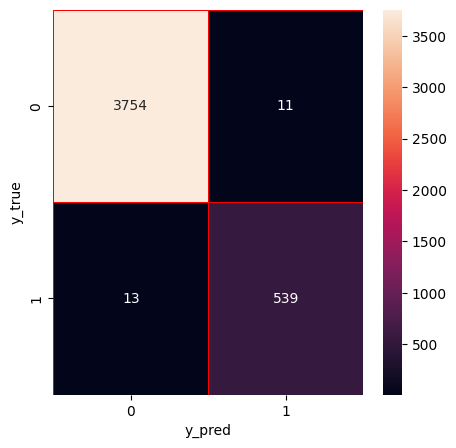

In [ ]:
psKnn_score,psKnn_precision,psKnn_recall,psKnn_fscore,none=kNN(PS_X_train,PS_X_test,PS_y_train, PS_y_test)

ANN accuracy:0.8738

In [ ]:
ANN(PS_X_train,PS_X_test,PS_y_train, PS_y_test)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9428 - loss: 150.9243
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9905 - loss: 16.8999
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9879 - loss: 28.9135
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 5.2658
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 11.8950
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9143 - loss: 114.8293
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 41.6893
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 402.7360
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9469 - loss: 31.9636
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7583 - loss: 0.3983
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9193 - loss: 121.1073
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8861 - loss: 56.3584
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.5160
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.2570
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9465 - loss: 0.5043
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy mean: 0.8750121597609901
Accuracy variance: 0.0020102099797767877


### Classification pour DDOS et BENIGN:

Random Forest Accuracy: 0.9993394980184941
Random Forest precision_recall_fscore: 0.9993393316176161 0.9993394980184941 0.9993393295022941


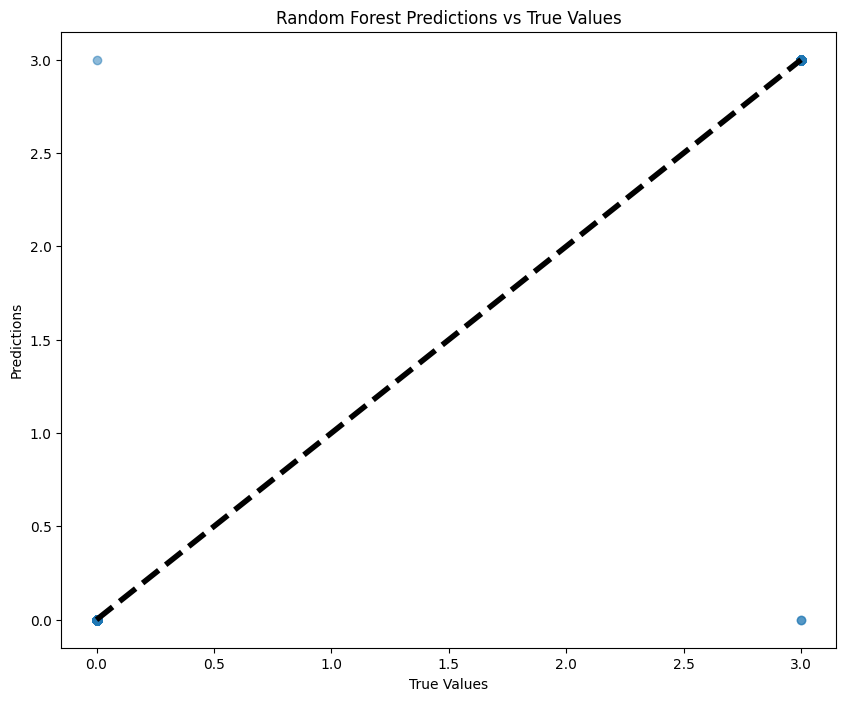

In [ ]:
ddosrf_score,ddosrf_precision,ddosrf_recall,ddosrf_fscore,none=RandomForest(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

Decision Tree Accuracy: 0.9993394980184941
Decision Tree precision_recall_fscore: 0.9993400047663319 0.9993394980184941 0.9993396662502321


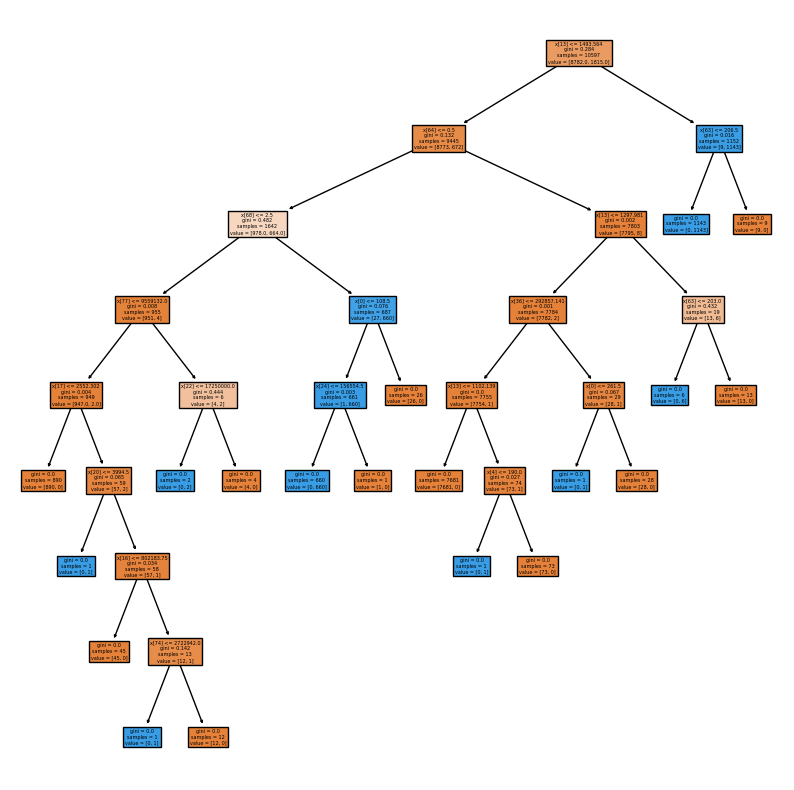

In [ ]:
ddosdt_score,ddosdt_precision,ddosdt_recall,ddosdt_fscore,none=DecisionTree(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

Score du 5-NN: 0.9894319682959049


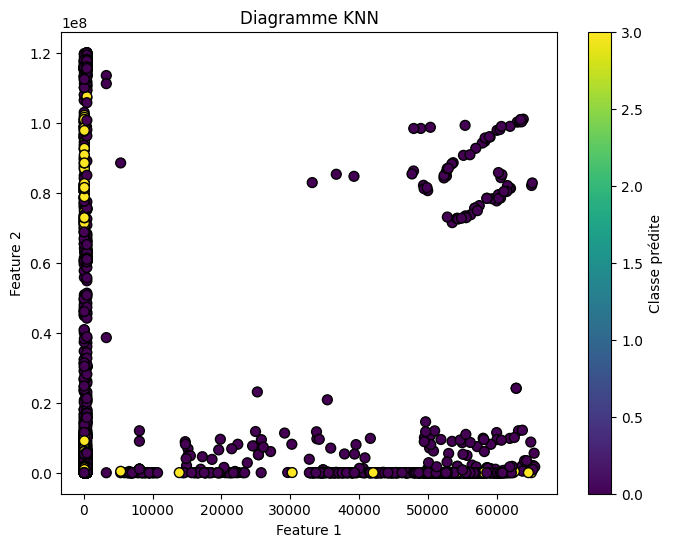

Précision, rappel, F-score du 5-NN: 0.9898281712777037 0.9894319682959049 0.9895260657324145


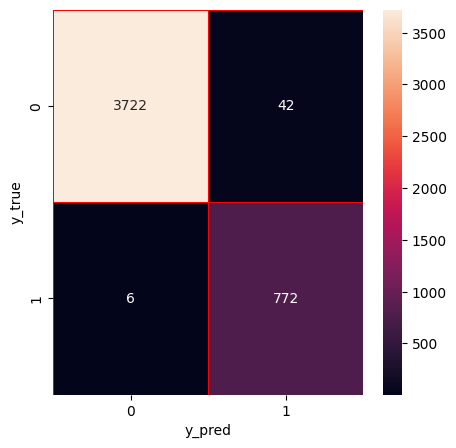

In [ ]:
ddosKnn_score,ddosKnn_precision,ddosKnn_recall,ddosKnn_fscore,none=kNN(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

ANN accuracy:0.8307

In [ ]:
ANN(DDoSX_train, DDoSX_test, DDoSy_train, DDoSy_test)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8602 - loss: 1173.6697
Epoch 2/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8872 - loss: 5.4269
Epoch 3/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9087 - loss: 1.2055
Epoch 4/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9213 - loss: 0.1845
Epoch 5/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.6686
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8301 - loss: 810.8703
Epoch 2/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.2911
Epoch 3/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.2824
Epoch 4/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8318 - loss: 0.2844
Epoch 5/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.3263
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8836 - loss: 898.9029
Epoch 2/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8921 - loss: 0.7749
Epoch 3/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9290 - loss: 0.4969
Epoch 4/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.3054
Epoch 5/5
221/221 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9273 - loss: 0.4305
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy mean: 0.8940166100415251
Accuracy variance: 0.042719365189681904


### Classification pour attaque normal et anormal:

Random Forest Accuracy: 0.9966432225063938
Random Forest precision_recall_fscore: 0.996643503021169 0.9966432225063938 0.996643336211777


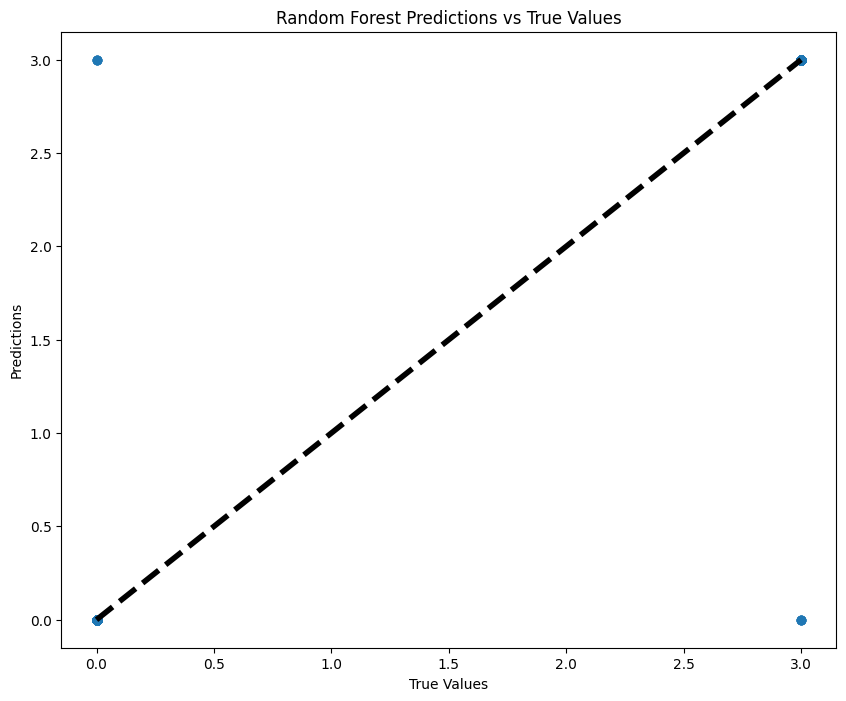

In [ ]:
narf_score,narf_precision,narf_recall,narf_fscore,none=RandomForest(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Decision Tree Accuracy: 0.9972826086956522
Decision Tree precision_recall_fscore: 0.9972885540393928 0.9972826086956522 0.9972834314617541


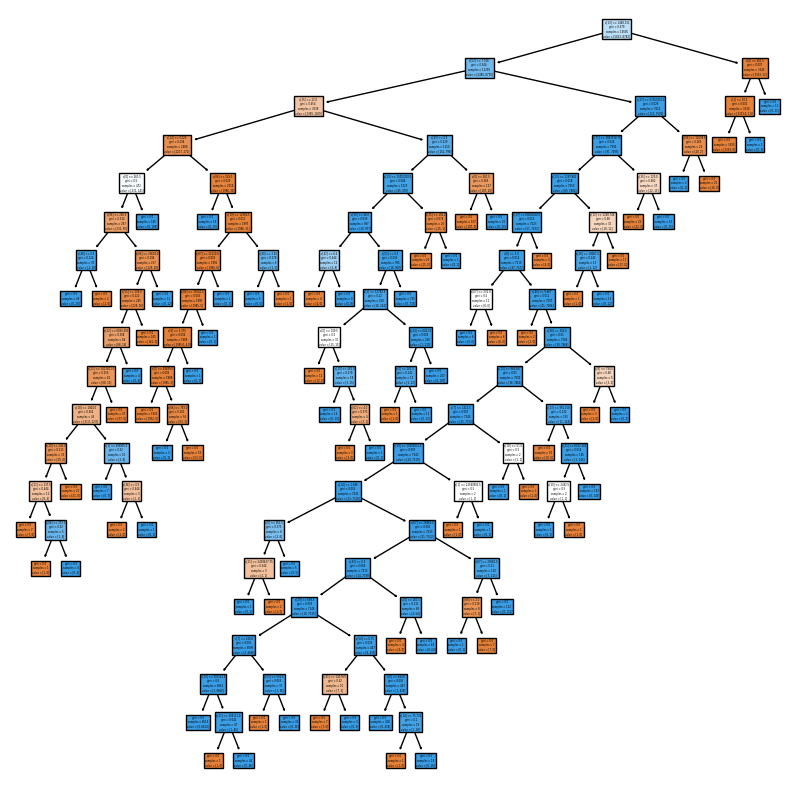

In [ ]:
nadt_score,nadt_precision,nadt_recall,nadt_fscore,none=DecisionTree(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Score du 5-NN: 0.9771419437340153


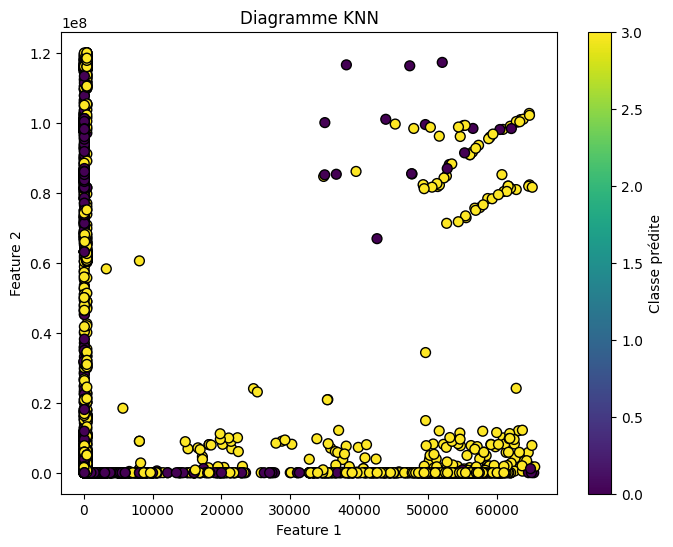

Précision, rappel, F-score du 5-NN: 0.9773136864279101 0.9771419437340153 0.9771754818755428


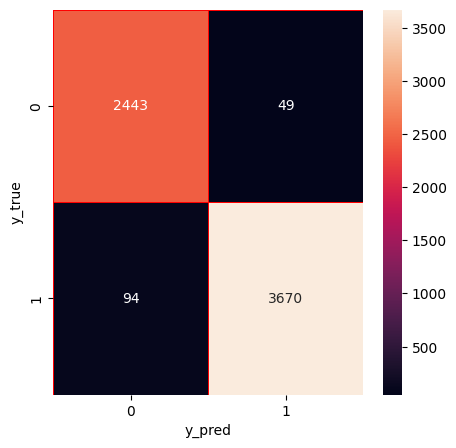

In [ ]:
naKnn_score,naKnn_precision,naKnn_recall,naKnn_fscore,none=kNN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

ANN accuracy:0.6034

In [ ]:
ANN(NA_X_train, NA_X_test, NA_y_train, NA_y_test)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8142 - loss: 2846.9170
Epoch 2/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 1.1145
Epoch 3/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.4692
Epoch 4/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7849 - loss: 1.7000
Epoch 5/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6676 - loss: 1.5797
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6543 - loss: 4374.7847
Epoch 2/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6364 - loss: 1.0445
Epoch 3/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6043 - loss: 0.5809
Epoch 4/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6125 - loss: 0.7274
Epoch 5/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6629 - loss: 0.6890
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


305/305 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6998 - loss: 1487.9143
Epoch 2/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6039 - loss: 0.6841
Epoch 3/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6064 - loss: 1.2235
Epoch 4/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6123 - loss: 0.6039
Epoch 5/5
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6072 - loss: 0.5707
 88/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## Résumé accuracy

In [ ]:
d={'Algoritmalar': ["Random Forest", "Decision Tree","KNN","ANN"],
   'DoS accuracy': [dosrf_score,dosdt_score,dosKnn_score,0.7636],
   'DDoS accuracy': [ddosrf_score, ddosdt_score,ddosKnn_score,0.8307],
   'Port Scan accuracy':[psrf_score,psdt_score,psKnn_score,0.8738],
   'Normal/Anormal accuracy':[narf_score,nadt_score,naKnn_score,0.6034],
  }
dataframe= pd.DataFrame(data=d)
dataframe

,Algoritmalar,DoS accuracy,DDoS accuracy,Port Scan accuracy,Normal/Anormal accuracy
0,Random Forest,0.996766,0.999339,0.998840,0.997442
1,Decision Tree,0.997372,0.999339,0.998840,0.997602
2,KNN,0.980190,0.991413,0.995129,0.975543
3,ANN,0.763600,0.830700,0.873800,0.603400
